O companie de telecomunicaţii doreşte să estimeze rata medie de apeluri primite de un call center într-o oră. Din datele istorice, compania știe că rata medie de apeluri pe oră variază în funcție de perioadele zilei şi de anumite zile din săptămână. Într-o anumită perioadă, managerul observă că, timp de 10 ore, au fost primite un total de 180 de apeluri. Să notăm cu rata medie de apeluri pe oră. Având în vedere că numărul de apeluri pe oră poate fi modelat ca o variabilă Poisson, avem următoarele informații:

*Datele observate: În 10 ore, au fost primite 180 de apeluri, ceea ce oferă o rată medie observată de 18 apeluri pe
oră.

*Distribuţia verosimilității: Presupunem că numărul de apeluri pe oră urmează o distribuție Poisson cu parametru
λ.

Alegând o distribuție Gamma ca distribuție a priori pentru λ (deoarece este conjugata a priori a distribuţiei Poisson), determinați distribuția a posteriori, un interval HDI de 94% şi cea mai probabilă valoare a lui λ. Indicații:

*Distribuția Poisson cu parametrul >> 0 este dată de P(X = k) = e−11k
k!

*Distribuţia Gamma cu parametrii a, ẞ> 0 este dată de p(^) modul [(α-1) v0]/B). Cum alegem parametrii a şi ẞ?
=
T(a)
---BA (cu media a/ẞ, dispersia a/p2 şi

*Un interval HDI al unei distribuții (şi modul ei) se poate apela în librăria Arviz cu plot_posterior.

Numar de apeluri pe ora (cel mai probabil) 17.9
Intervalul HDI [15.56254544 20.60654989]


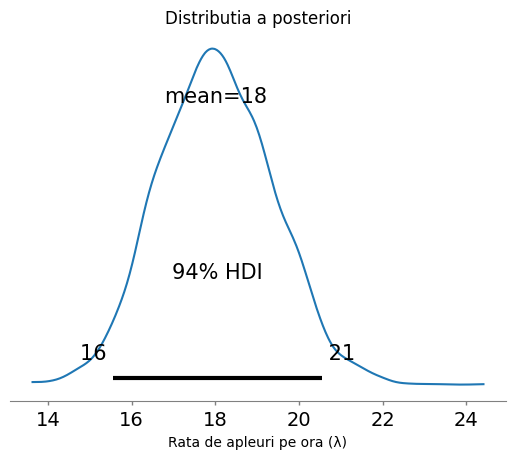

In [24]:
import scipy.stats as stats
import arviz as az
import matplotlib.pyplot as plot

alpha_posterior = 180
beta_posterior = 10

posterior_distribution = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)

lambda_mode = (alpha_posterior - 1) / beta_posterior
hdi_interval_manual = posterior_distribution.ppf([0.03, 0.97])

print("Numar de apeluri pe ora (cel mai probabil)", lambda_mode)
print("Intervalul HDI", hdi_interval_manual)

posterior_samples = posterior_distribution.rvs(10000)
az.plot_posterior(posterior_samples, hdi_prob=0.94)
plot.xlabel('Rata de apleuri pe ora (λ)')
plot.title('Distributia a posteriori')
plot.show()